# Prepare out enviroments

## For Manipulation

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
pd.__version__

'1.2.5'

## For Model

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Read our csv file

In [8]:
path_file = 'cars_to_model_development.csv'
path_file

'cars_to_model_development.csv'

In [9]:
df_cars = pd.read_csv(path_file)
df_cars

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0


(0.0, 48160.0809376415)

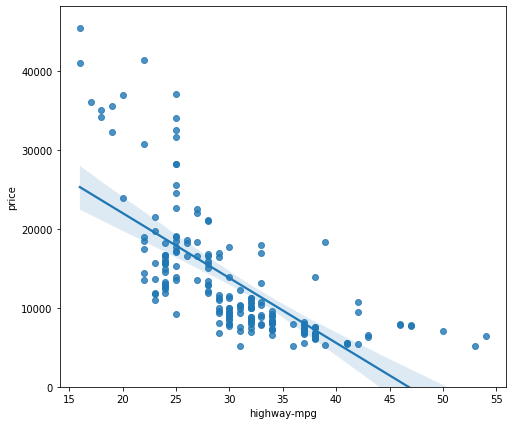

In [10]:
plt.figure(figsize=(8,7))
sns.regplot(x = 'highway-mpg', y = 'price', data = df_cars)
plt.ylim(0,)

In [12]:
coeff, p_value = stats.pearsonr(df_cars['highway-mpg'], df_cars['price'])
print('Correlation Coefficient: {}, P-Value: {}'.format(coeff, p_value))

Correlation Coefficient: -0.704692265058953, P-Value: 1.7495471144476358e-31


# Linear Regression

In [32]:
# Create LinearRegression object
lm = LinearRegression()
x = df_cars[['highway-mpg']]
y = df_cars['price']
lm.fit(x,y)
yhat = lm.predict(x)

In [20]:
lm.coef_

array([-821.73337832])

In [21]:
lm.intercept_

38423.3058581574

**Equation**

price = -821.73337 + 38423.305858*_**highway-mpg**_

In [35]:
for i in range(5):
    print('Value {} -> Real: {}, Predict: {}'.format(i, y[i], yhat[i]))

Value 0 -> Real: 13495.0, Predict: 16236.504643465414
Value 1 -> Real: 16500.0, Predict: 16236.504643465414
Value 2 -> Real: 16500.0, Predict: 17058.23802178734
Value 3 -> Real: 13950.0, Predict: 13771.304508499637
Value 4 -> Real: 17450.0, Predict: 20345.171535075042


In [39]:
# test with the fist element
yhat_0 = 38423.3058581574 - 821.73337*x.iloc[0]
print('yhat_0: {}'.format(yhat_0[0]))

yhat_0: 16236.5048681574


In [17]:
lm.score(x, y)

0.4965911884339176

In [19]:
mean_squared_error(y, yham)

31635042.944639888

# Multiple Linear Regression

What if we want to predict car price using more than one variable?

In [40]:
z = df_cars[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [41]:
lm2 = LinearRegression()
lm2.fit(z, y)

LinearRegression()

In [42]:
lm2.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [43]:
lm2.intercept_

-15806.624626329209

**Equation**

price = -15806.624626329209 53.49574423*_**horsepower**_ + 4.70770099*_**curb-weight**_ + 81.53026382*_**engine-size**_ + 36.05748882*_**highway-mpg**_

# Model Evaluation using Visualization

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=fabb4e41-fcd2-4421-bbfb-772986975631' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>